# Proyecto: Cross Validation con Random Forest (Clasificación múltiple de dígitos escritos a mano)

## Después de entrenar un algoritmo es importante asignarle una calificación (o nivel de confinaza)
## para saber con que precisión seran sus predicciones. Para esto usaremos la técnica Validación Cruzada
## o "Cross Validation" https://scikit-learn.org/stable/modules/cross_validation.html 

## A continuación veremos el uso de las funciones `KFold` y `cross_val_score` para realizar validación cruzada  

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# base de datos
from tensorflow.keras.datasets import mnist

# importar metricas de error y precision:
from sklearn.metrics import mean_squared_error, r2_score

# función para separar los datos en Cross-Validation:
from sklearn.model_selection import KFold, cross_val_score

# Librería para usar el clasificador de árboles de decisión:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Librería para usar el clasificador de random forest:
from sklearn.ensemble import RandomForestClassifier

# Iimportamos metrica de 'Matriz de confusión' para evaluar el aprendizaje:
from sklearn.metrics import confusion_matrix


## Cargamos datos de entrenamiento y pruebas:

In [2]:
# cargamos los datos:
(x_features_train, y_labels_train), (x_features_test, y_labels_test) = mnist.load_data()

# Imprimimos dimensiones:
print('x_features_train.shape = ',x_features_train.shape)
print('y_labels_train.shape = ',y_labels_train.shape)
print('\nx_features_test.shape = ',x_features_test.shape)
print('y_labels_test.shape = ',y_labels_test.shape)

x_features_train.shape =  (60000, 28, 28)
y_labels_train.shape =  (60000,)

x_features_test.shape =  (10000, 28, 28)
y_labels_test.shape =  (10000,)


In [3]:
# Las etiquetas toman valores enteros entre 0 y 9, es decir, hay 10 clases posibles
classes = np.unique(y_labels_train)
print('valores de las clases: ',classes)

n_clases = len(classes)
n_clases

valores de las clases:  [0 1 2 3 4 5 6 7 8 9]


10

In [4]:
# Definimos el nombre de las etiquetas:
class_names = ['cero', 'uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve']

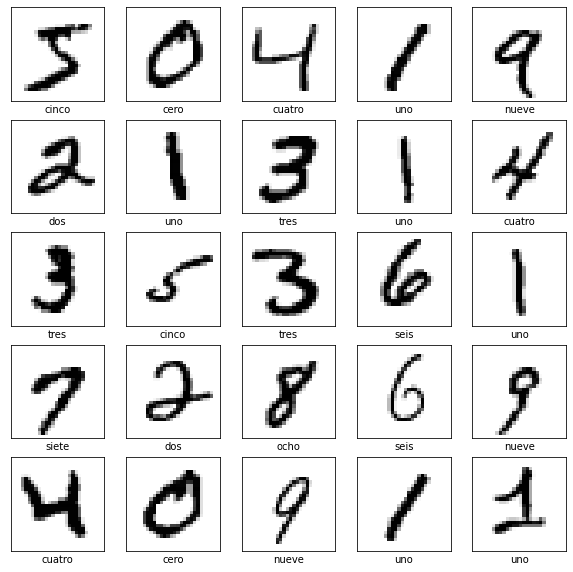

In [5]:
# Visualizamos features de entrenamiento sin estandarizar

plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid('off')

    imagen = x_features_train[i,:,:]
    label_imagen = y_labels_train[i]
    nombre_imagen = class_names[ label_imagen ]    

    plt.imshow( imagen, cmap=plt.cm.binary)
    plt.xlabel(nombre_imagen)

## Codificación de features que pasarán por el modelo:

In [6]:
# Extraemos dimensiones de features de entrenamiento y pruebas:
s_a = x_features_train.shape
s_b = x_features_test.shape

# Codificamos los features (de entrenamiento y prueba) que pasaran por el modelo
# (en vez de usar arreglos 3D de 'N x P x Q', usaremos arreglos 2D de 'N x P*Q' )
x_features_train = x_features_train.reshape((s_a[0],  s_a[1]*s_a[2]))
x_features_test = x_features_test.reshape((s_b[0],  s_b[1]*s_b[2]))


# normalizamos valores (dividiendo entre el máximo '255') para que los valores esten entre 0 y 1. 
# y los pasamos al tipo 'float32'
x_features_train = x_features_train.astype('float32')/255
x_features_test = x_features_test.astype('float32')/255


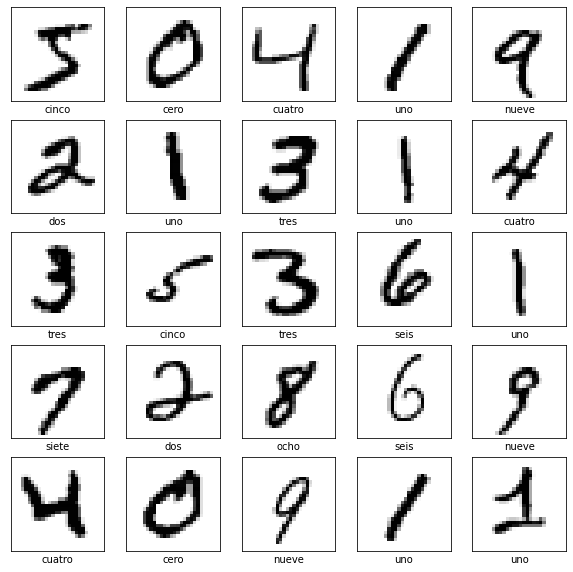

In [7]:
# Visualizamos features de entrenamiento codificados

plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid('off')

    imagen = x_features_train[i,:].reshape( s_a[1] , s_a[2] )
    label_imagen = y_labels_train[i]
    nombre_imagen = class_names[ label_imagen ]    

    plt.imshow( imagen, cmap=plt.cm.binary)
    plt.xlabel(nombre_imagen)

## Declaramos el modelo y lo entrenamos:

In [8]:
# creamos el clasificador de RandomForest

# parámetros:
# n_estimators <--- numero de árboles que queremos en la red
# min_samples_split <--- número mínimo de particiones en los nodos del arbol
# min_samples_leaf  <--- número mínimo de samples que tenemos al final del árbol

n_trees=150
clasif_RF = RandomForestClassifier(n_estimators=n_trees, min_samples_split=2)

In [9]:
# Entrenamos el modelo con los datos de entrenamiento: 
clasif_RF.fit(x_features_train, y_labels_train)

RandomForestClassifier(n_estimators=150)

In [10]:
# Calculamos la precisión con datos de entrenamiento:
acc_train = clasif_RF.score(x_features_train, y_labels_train)
print('El accuracy con los datos de entrenamiento es:' , acc_train)

# Calculamos la precisión con datos de prueba:
acc_test = clasif_RF.score(x_features_test, y_labels_test)
print('El accuracy con los datos de prueba es:' , acc_test)

El accuracy con los datos de entrenamiento es: 1.0
El accuracy con los datos de prueba es: 0.9702


Debido a que el accuracy con datos de entrenamiento y prueba son muy cercanos, no hay Overfitting

## Ya que esta entrenado el modelo evaluamos su precisión mediante Cross Validation:

In [11]:
## Definimos el separador K-Fold para hacer Cross-Validation, aplicado a los datos de entrenamiento: 

n_subsets = 2 #10 # numero de particiones para K-fold

kf = KFold(n_splits= n_subsets , shuffle=True, random_state=2)

In [12]:
# Realizamos la Cross Validation:
scores_CV = cross_val_score(clasif_RF, x_features_train, y_labels_train, cv=kf, scoring='accuracy')

In [13]:
print("Accuracy en cada iteración de Cross-Validation:", scores_CV)
 
print("Accuracy final con Cross-Validation:", scores_CV.mean())

Accuracy en cada iteración de Cross-Validation: [0.96393333 0.96273333]
Accuracy final con Cross-Validation: 0.9633333333333334


## A continuación hacemos pruebas con los datos de pruebas:

In [14]:
# Una vez que el clasificador esta entrenado y validado con Cross Validation
# lo aplicamos a los datos de prueba para generar etiquetas predichas:
y_labels_test_predicted = clasif_RF.predict(x_features_test)
y_labels_test_predicted.shape

(10000,)

Matriz de confusión: 
 [[ 969    0    0    0    0    3    3    1    3    1]
 [   0 1122    3    3    0    2    3    1    1    0]
 [   6    0  999    5    3    0    4    9    6    0]
 [   1    0   12  972    0    6    0    9    7    3]
 [   1    0    1    0  957    0    5    0    2   16]
 [   2    0    2   13    3  859    4    2    6    1]
 [   7    3    0    0    3    3  939    0    3    0]
 [   1    3   20    1    0    0    0  993    1    9]
 [   5    0    3   10    5    4    5    5  929    8]
 [   7    5    2    8   10    1    1    4    8  963]]


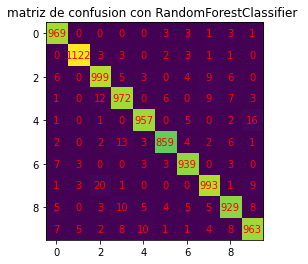

In [15]:
# Generamos matriz de confusión usando las etiquetas de prueba y etiquetas predichas:
MC_RF = confusion_matrix(y_labels_test, y_labels_test_predicted)
print('Matriz de confusión: \n',MC_RF)

plt.figure()
plt.imshow(MC_RF)
plt.title('matriz de confusion con RandomForestClassifier ')

#plt.xticks( range(n_clases) , class_names )
#plt.yticks( range(n_clases) , class_names )

for i in range( n_clases ):
    for j in range( n_clases):
        plt.text(j,i, MC_RF[i,j] , ha='center', va='center' ,color='red')

plt.show()

In [16]:
# Calculamos el porcetaje de datos que han sido bien clasificados:

# score = (suma de elementos de la diagonal)/(suma de todos los elementos)

score_RF = ( sum(MC_RF.diagonal())/sum(sum(MC_RF)) )*100

print('\nPorcentaje de datos clasificados correctamente usando RandomForest con Validación-Cruzada = ', score_RF, '%')


Porcentaje de datos clasificados correctamente usando RandomForest con Validación-Cruzada =  97.02 %


In [17]:
clasif_RF.score(x_features_test, y_labels_test)*100

97.02

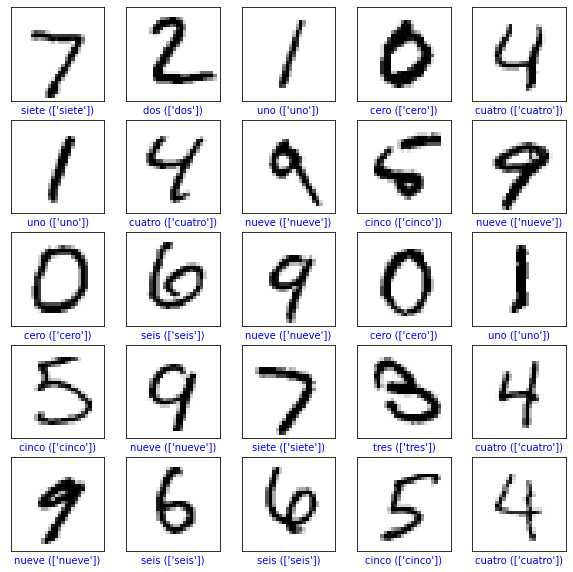

In [18]:
# Visualizamos imagenes predichas usando los datos de pruebas

plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid('off')   

    true_label =  y_labels_test[i]    
    aprox_label = y_labels_test_predicted[i]

    if true_label == aprox_label:
        col = 'blue'
    else:
        col = 'red'

    imagen = x_features_test[i,:].reshape( s_b[1] , s_b[2] )
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel('{} ({})'.format( class_names[true_label], [class_names[aprox_label]]), color=col)

# Guardamos el modelo entrenado para usarlo posteriormente sin tener que volver a entrenar:

In [19]:
# Importamos función para guardar el modelo entrenado:
#import joblib

#joblib.dump(clasif_RF , 'modelo_entrenado_RF_Mnist.pkl')